In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import accuracy_score


In [2]:
data = pd.read_excel('ML Data.xlsx')

In [3]:
data.head()

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,...,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission
0,aj_01,2019-03-02 15:43:00,2008.0,8.0,No,Weak,NaN,NaN,NaN,NaN,...,NaN,NaN,Pickup Low,Starter Motor / Solenoid malfunctioning,NaN,NaN,NaN,Petrol + CNG,124600.0,3.0
1,aj_02,1/16/19 13:02,2007.0,5.0,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,78108.0,4.0
2,aj_03,2019-09-02 13:31:00,2012.0,5.0,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diesel,93348.0,3.5
3,aj_04,1/18/19 11:02,2013.0,1.0,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,48233.0,3.5
4,aj_05,1/27/19 12:12,2011.0,7.0,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,74368.0,4.0


In [4]:
data.columns

Index(['appointmentId', 'inspectionStartTime', 'year', 'month',
       'engineTransmission_battery_value',
       'engineTransmission_battery_cc_value_0',
       'engineTransmission_battery_cc_value_1',
       'engineTransmission_battery_cc_value_2',
       'engineTransmission_battery_cc_value_3',
       'engineTransmission_battery_cc_value_4',
       'engineTransmission_engineoilLevelDipstick_value',
       'engineTransmission_engineOilLevelDipstick_cc_value_0',
       'engineTransmission_engineOil',
       'engineTransmission_engineOil_cc_value_0',
       'engineTransmission_engineOil_cc_value_1',
       'engineTransmission_engineOil_cc_value_2',
       'engineTransmission_engineOil_cc_value_3',
       'engineTransmission_engineOil_cc_value_4',
       'engineTransmission_engineOil_cc_value_5',
       'engineTransmission_engineOil_cc_value_6',
       'engineTransmission_engineOil_cc_value_7',
       'engineTransmission_engineOil_cc_value_8',
       'engineTransmission_engineOil_cc_val

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26307 entries, 0 to 26306
Data columns (total 73 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   appointmentId                                              26307 non-null  object 
 1   inspectionStartTime                                        26307 non-null  object 
 2   year                                                       26307 non-null  float64
 3   month                                                      26307 non-null  float64
 4   engineTransmission_battery_value                           26307 non-null  object 
 5   engineTransmission_battery_cc_value_0                      3438 non-null   object 
 6   engineTransmission_battery_cc_value_1                      430 non-null    object 
 7   engineTransmission_battery_cc_value_2                      72 non-null     object 
 8   engine

In [6]:
data.isnull().sum()


appointmentId                              0
inspectionStartTime                        0
year                                       0
month                                      0
engineTransmission_battery_value           0
                                       ...  
engineTransmission_comments_value_3    26248
engineTransmission_comments_value_4    26293
fuel_type                                  0
odometer_reading                           0
rating_engineTransmission                  0
Length: 73, dtype: int64

In [9]:
#columns drop with less than 60%
null_percent = data.isnull().sum()/data.shape[0]*100
drop_column = null_percent[null_percentage>60].keys()
dataa = data.drop(drop_column, axis=1)


In [10]:
output_df

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engine_value,...,engineTransmission_engineSound_cc_value_1,engineTransmission_exhaustSmoke_value,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_gearShifting_value,fuel_type,odometer_reading,rating_engineTransmission
0,aj_01,2019-03-02 15:43:00,2008.0,8.0,No,Yes,No,Leaking,Dirty,No,...,Water Pump Brg Noise,No,No,Back Compression Exist,No,Spongy,Yes,Petrol + CNG,124600.0,3.0
1,aj_02,1/16/19 13:02,2007.0,5.0,Yes,Yes,No,Leaking,Dirty,No,...,Tappet Noise,No,Yes,NO Blow-by,Yes,NaN,Yes,Petrol + CNG,78108.0,4.0
2,aj_03,2019-09-02 13:31:00,2012.0,5.0,Yes,Yes,No,Dirty,NaN,Yes,...,Engine Auxiliary Noise,No,Yes,Perm. Blow By on idle,No,Hard,Yes,Diesel,93348.0,3.5
3,aj_04,1/18/19 11:02,2013.0,1.0,Yes,Yes,No,Dirty,NaN,Yes,...,NaN,Yes,Yes,NO Blow-by,No,Hard,Yes,Petrol + CNG,48233.0,3.5
4,aj_05,1/27/19 12:12,2011.0,7.0,Yes,Yes,No,Leaking,Leakage from Tappet Cover,No,...,Tappet Noise,No,Yes,NO Blow-by,No,Spongy,Yes,Petrol + CNG,74368.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26302,aj_26303,2019-10-03 13:08:00,2013.0,3.0,Yes,Yes,No,Leaking,Dirty,Yes,...,Tappet Noise,Yes,Yes,NO Blow-by,Yes,NaN,Yes,Petrol + CNG,64532.0,4.0
26303,aj_26304,2019-12-04 13:59:00,2007.0,8.0,No,No,No,Dirty,NaN,No,...,Timing Noise,Yes,No,Back Compression Exist,No,Hard,Yes,Petrol,88051.0,4.0
26304,aj_26305,2/28/19 10:42,2004.0,7.0,Yes,Yes,No,Leaking,Dirty,No,...,Tappet Noise,Yes,Yes,NO Blow-by,No,Hard,Yes,Petrol,22656.0,3.5
26305,aj_26306,2019-02-04 12:21:00,2010.0,12.0,Yes,Yes,No,Dirty,Leakage from Sump/chamber,Yes,...,NaN,No,Yes,NO Blow-by,Yes,NaN,Yes,Diesel,126015.0,4.5


In [11]:
dataa.isnull().mean()*100

appointmentId                                                 0.000000
inspectionStartTime                                           0.000000
year                                                          0.000000
month                                                         0.000000
engineTransmission_battery_value                              0.000000
engineTransmission_engineoilLevelDipstick_value               0.000000
engineTransmission_engineOil                                  0.000000
engineTransmission_engineOil_cc_value_0                      29.459840
engineTransmission_engineOil_cc_value_1                      58.170829
engineTransmission_engine_value                               0.000000
engineTransmission_coolant_value                              0.000000
engineTransmission_engineMounting_value                       0.000000
engineTransmission_engineSound_value                          0.000000
engineTransmission_engineSound_cc_value_0                    27.471776
engine

In [13]:
dataa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26307 entries, 0 to 26306
Data columns (total 24 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   appointmentId                                              26307 non-null  object 
 1   inspectionStartTime                                        26307 non-null  object 
 2   year                                                       26307 non-null  float64
 3   month                                                      26307 non-null  float64
 4   engineTransmission_battery_value                           26307 non-null  object 
 5   engineTransmission_engineoilLevelDipstick_value            26307 non-null  object 
 6   engineTransmission_engineOil                               26307 non-null  object 
 7   engineTransmission_engineOil_cc_value_0                    18557 non-null  object 
 8   engine

<AxesSubplot:>

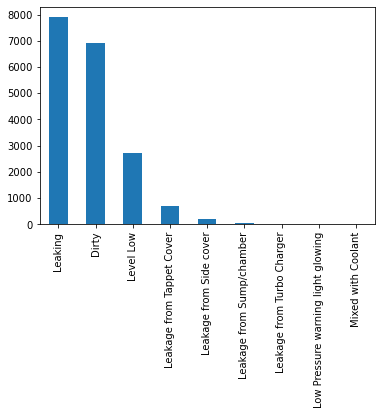

In [15]:
dataa['engineTransmission_engineOil_cc_value_0'].value_counts().plot(kind ='bar')

<AxesSubplot:>

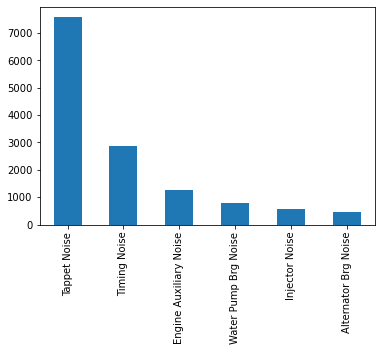

In [16]:
dataa['engineTransmission_engineSound_cc_value_1'].value_counts().plot(kind ='bar')

<AxesSubplot:>

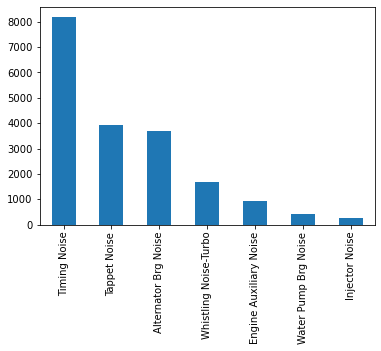

In [17]:
dataa['engineTransmission_engineSound_cc_value_0'].value_counts().plot(kind ='bar')


<AxesSubplot:>

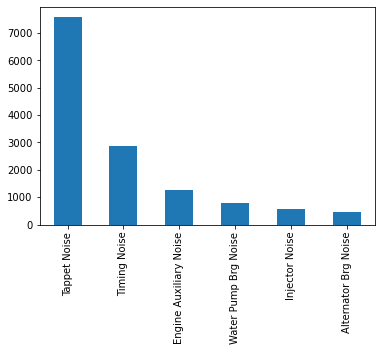

In [18]:
dataa['engineTransmission_engineSound_cc_value_1'].value_counts().plot(kind ='bar')

<AxesSubplot:>

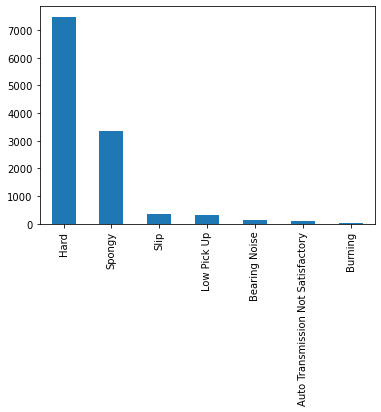

In [19]:
dataa['engineTransmission_clutch_cc_value_0'].value_counts().plot(kind ='bar')

In [22]:
dataa['engineTransmission_engineOil_cc_value_0'].fillna('Leaking',inplace =True)
dataa['engineTransmission_engineSound_cc_value_1'].fillna('Tappet Noise',inplace =True)
dataa['engineTransmission_engineSound_cc_value_0'].fillna('Timing Noise',inplace =True)
dataa['engineTransmission_engineSound_cc_value_1'].fillna('Tappet Noise',inplace =True)
dataa['engineTransmission_clutch_cc_value_0'].fillna('Hard',inplace =True)

In [23]:
dataa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26307 entries, 0 to 26306
Data columns (total 24 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   appointmentId                                              26307 non-null  object 
 1   inspectionStartTime                                        26307 non-null  object 
 2   year                                                       26307 non-null  float64
 3   month                                                      26307 non-null  float64
 4   engineTransmission_battery_value                           26307 non-null  object 
 5   engineTransmission_engineoilLevelDipstick_value            26307 non-null  object 
 6   engineTransmission_engineOil                               26307 non-null  object 
 7   engineTransmission_engineOil_cc_value_0                    26307 non-null  object 
 8   engine

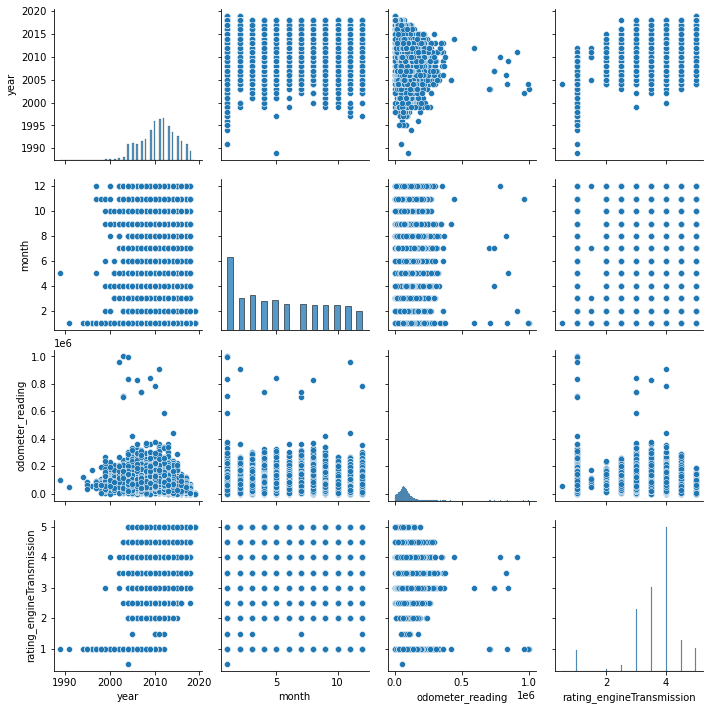

In [24]:
sns.pairplot(dataa)

In [29]:
corrmatrix= dataa.corr()

In [30]:
corrmatrix['rating_engineTransmission'].sort_values(ascending= False)

rating_engineTransmission    1.000000
year                         0.586554
month                        0.113765
odometer_reading            -0.363312
Name: rating_engineTransmission, dtype: float64

<AxesSubplot:>

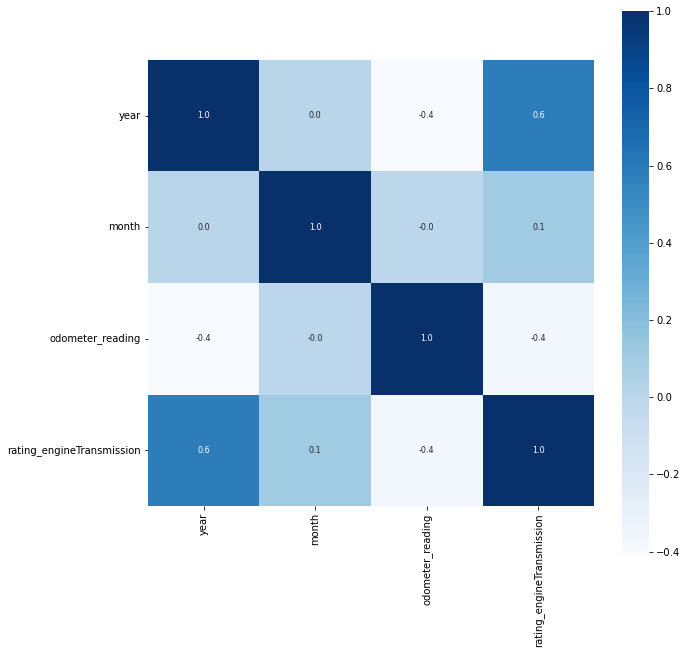

In [77]:
plt.figure(figsize=(10,10))
sns.heatmap(corrmatrix, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


In [42]:
dataa['year'] = dataa['year'].astype(int)

In [43]:
dataa['odometer_reading'] = dataa['odometer_reading'].astype(int)

In [44]:
dataa['rating_engineTransmission'] = dataa['rating_engineTransmission'].astype(int)

In [45]:
dataa['month'] = dataa['month'].astype(int)

In [46]:
corrmatrix['rating_engineTransmission'].sort_values(ascending= False)

rating_engineTransmission    1.000000
year                         0.586554
month                        0.113765
odometer_reading            -0.363312
Name: rating_engineTransmission, dtype: float64

In [47]:
dataa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26307 entries, 0 to 26306
Data columns (total 24 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   appointmentId                                              26307 non-null  object
 1   inspectionStartTime                                        26307 non-null  object
 2   year                                                       26307 non-null  int32 
 3   month                                                      26307 non-null  int32 
 4   engineTransmission_battery_value                           26307 non-null  object
 5   engineTransmission_engineoilLevelDipstick_value            26307 non-null  object
 6   engineTransmission_engineOil                               26307 non-null  object
 7   engineTransmission_engineOil_cc_value_0                    26307 non-null  object
 8   engineTransmissi

In [53]:
dataa.drop(['appointmentId','inspectionStartTime'],axis= 1, inplace=True)

KeyError: "['appointmentId' 'inspectionStartTime'] not found in axis"

In [54]:
from sklearn.preprocessing import LabelEncoder
Encoding=LabelEncoder()

In [57]:
dataa['engineTransmission_battery_value']= Encoding.fit_transform(dataa['engineTransmission_battery_value'])
dataa['engineTransmission_engineoilLevelDipstick_value']= Encoding.fit_transform(dataa['engineTransmission_engineoilLevelDipstick_value'])
dataa['engineTransmission_engineOil']= Encoding.fit_transform(dataa['engineTransmission_engineOil'])
dataa['engineTransmission_engine_value']= Encoding.fit_transform(dataa['engineTransmission_engine_value'])
dataa['engineTransmission_coolant_value']= Encoding.fit_transform(dataa['engineTransmission_coolant_value'])
dataa['engineTransmission_engineMounting_value']= Encoding.fit_transform(dataa['engineTransmission_engineMounting_value'])
dataa['engineTransmission_engineSound_value']= Encoding.fit_transform(dataa['engineTransmission_engineSound_value'])
dataa['engineTransmission_engineSound_cc_value_0']= Encoding.fit_transform(dataa['engineTransmission_engineSound_cc_value_0'])
dataa['engineTransmission_exhaustSmoke_value']= Encoding.fit_transform(dataa['engineTransmission_exhaustSmoke_value'])
dataa['engineTransmission_engineBlowByBackCompression_value']= Encoding.fit_transform(dataa['engineTransmission_engineBlowByBackCompression_value'])
dataa['engineTransmission_engineBlowByBackCompression_cc_value_0']= Encoding.fit_transform(dataa['engineTransmission_engineBlowByBackCompression_cc_value_0'])
dataa['engineTransmission_clutch_value']= Encoding.fit_transform(dataa['engineTransmission_clutch_value'])
dataa['engineTransmission_gearShifting_value']= Encoding.fit_transform(dataa['engineTransmission_gearShifting_value'])
dataa['fuel_type']= Encoding.fit_transform(dataa['fuel_type'])
dataa['engineTransmission_clutch_cc_value_0']= Encoding.fit_transform(dataa['engineTransmission_clutch_cc_value_0'])
dataa['engineTransmission_engineSound_cc_value_1']= Encoding.fit_transform(dataa['engineTransmission_engineSound_cc_value_1'])
dataa['engineTransmission_engineOil_cc_value_1']= Encoding.fit_transform(dataa['engineTransmission_engineOil_cc_value_1'])
dataa['engineTransmission_engineOil_cc_value_0']= Encoding.fit_transform(dataa['engineTransmission_engineOil_cc_value_0'])

In [58]:
dataa

,year,month,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engine_value,engineTransmission_coolant_value,engineTransmission_engineMounting_value,...,engineTransmission_engineSound_cc_value_1,engineTransmission_exhaustSmoke_value,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_gearShifting_value,fuel_type,odometer_reading,rating_engineTransmission
0,2008,8,0,1,0,5,0,0,0,0,...,5,0,0,0,0,6,1,4,124600,3
1,2007,5,1,1,0,5,0,0,0,1,...,3,0,1,1,1,3,1,4,78108,4
2,2012,5,1,1,0,0,8,1,0,0,...,1,0,1,3,0,3,1,0,93348,3
3,2013,1,1,1,0,0,8,1,0,1,...,3,1,1,1,0,3,1,4,48233,3
4,2011,7,1,1,0,5,3,0,1,0,...,3,0,1,1,0,6,1,4,74368,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26302,2013,3,1,1,0,5,0,1,0,1,...,3,1,1,1,1,3,1,4,64532,4
26303,2007,8,0,0,0,0,8,0,0,0,...,4,1,0,0,0,3,1,3,88051,4
26304,2004,7,1,1,0,5,0,0,0,0,...,3,1,1,1,0,3,1,3,22656,3
26305,2010,12,1,1,0,0,2,1,1,0,...,3,0,1,1,1,3,1,0,126015,4


In [60]:
x = dataa.drop(['rating_engineTransmission'], axis=1)
y = dataa['rating_engineTransmission']

In [61]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test =train_test_split(x,y,test_size=0.3)


In [62]:
from sklearn.tree import DecisionTreeClassifier
classifier =DecisionTreeClassifier(criterion= 'gini')

In [63]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [64]:
classifier.predict(x_test)

array([4, 3, 3, ..., 4, 4, 3])

In [65]:
classifier.score(x_test,y_test)

0.5962245027239326

In [66]:
prediction=classifier.predict(x_test)
acc = round(accuracy_score(prediction , y_test)*100,2)

In [67]:
print(acc)

59.62


# Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
classifierr =RandomForestClassifier(n_estimators=100, criterion='gini')

In [70]:
classifierr.fit(x_train, y_train)

RandomForestClassifier()

In [71]:
classifierr.predict(x_test)

array([4, 3, 4, ..., 4, 4, 4])

In [73]:
classifierr.score(x_test,y_test)

0.6889649056125681

# Please answer the following:

1.Briefly describe your approach to this problem and the steps you took

steps:

import data using pandas library, then understand the data, and then detemine the null values in data, then apply train test split and after that fit the model and predict the accuracy

2.Basics:

a.How well does your model work?

most of the columns are having null values so the accuracy score is too good according to the given lack data.

b.How do you know for sure that’s how well it works?

I had taken all the necessary steps which are intial steps to moving with data and keep remind of all the failure so for sure thats well it works. 

c.What stats did you use to prove its predictive performance and why?

No,i don't use any stats

d.What issues did you encounter?

Main issue is dealing with null values beacz 64% of the data is with null value so to encounter them is big task

e.What insights did you obtain from this data? For example: What features are important? Why? What visualisations help you understand the data?

I get the insights by drawing heat map and pairplot to get some meaningful data.

Next steps:

a.What other data (if any) would have been useful?

if this data contain more column with numerical values then it will be helpful to get some high predictive score

b.What are some other things you would have done if you had more time?

if i get more time then i will take mean or median of the data to fill that null values and operate with that column also.